# Lab Overview

## Problem Definition
### Find out a Dataset, and compare at least two different algorithms and choose the best one
- Use suitable Data Preprocessing and Feature Selection/Engineering Methods
- Fine tune the model and hyper parameters and Finalise the Model
- Make the model deployment-ready by giving User-Input provision

# Objective
  - Selecting the best dataset.
  - Performing basic pre-processing.
  - Perform basic EDA.
  - Use Algorithms too get the accuracy of the dataset.
  - Demonstrate the accuracy of the dataset by comparing the models.
  - Illustrate the effect of hyperparameter tuning in the accuracy of the models.
  - Making deployment by giving user- input provision.

# Approach
 - Import all necessry libraries.
 - Works on the dataset.
 - Doing necessary EDA parts for visualizations.
 - Using algorithms to build the model accuracy.
 - Compare the accuracy in the algorithms.
 - Hypertune the model and compare the accuracy.
 - Make user- defined for the model.

# Code:

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
#Importing the dataset:
cust_churn=pd.read_csv("C:/Users/elakk/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
cust_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cust_churn.shape

(7043, 21)

In [6]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cust_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
cust_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Removing unneeded features

In [9]:
# Removing id
cust_churn = cust_churn.drop(['customerID'], axis = 1)
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
cust_churn.shape # customer id has been removed

(7043, 20)

In [11]:
# Checking for missing values
cust_churn['TotalCharges'] = pd.to_numeric(cust_churn.TotalCharges, errors='coerce')
cust_churn.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- We see that the Total Charges has 11 missing values

In [12]:
cust_churn[np.isnan(cust_churn['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

In [13]:
cust_churn[cust_churn['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the Tenure column.

- Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [14]:
cust_churn.drop(labels=cust_churn[cust_churn['tenure'] == 0].index, axis=0, inplace=True)
cust_churn[cust_churn['tenure'] == 0].index

Int64Index([], dtype='int64')

- To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [15]:
cust_churn.fillna(cust_churn["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
cust_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
cust_churn["SeniorCitizen"]= cust_churn["SeniorCitizen"].map({0: "No", 1: "Yes"})
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
cust_churn["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [19]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cust_churn[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


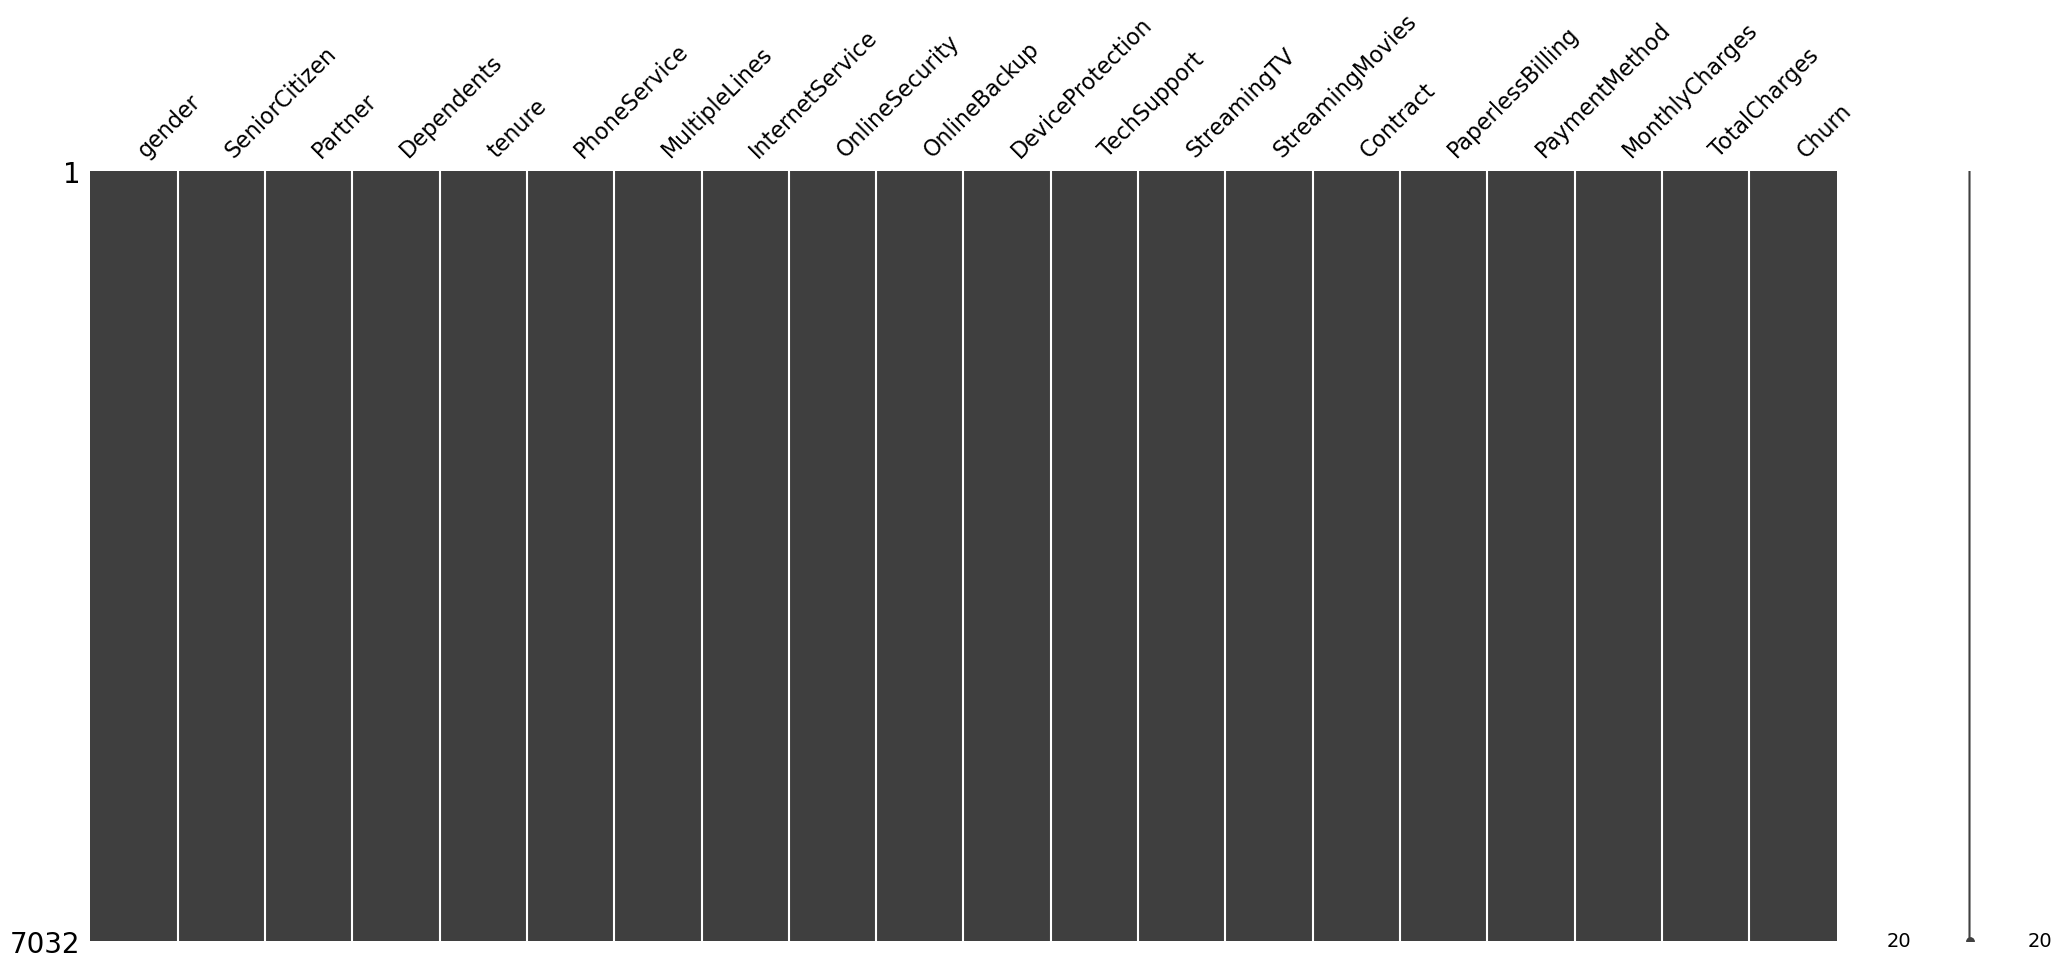

In [20]:
# Visualize missing values as a matrix
msno.matrix(cust_churn);

### Visualizing this, we conclude there is no missing values

### DATA VISUALIZATION

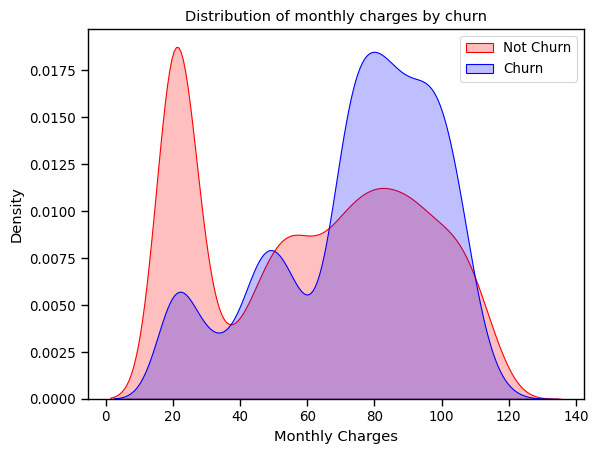

In [21]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(cust_churn.MonthlyCharges[(cust_churn["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(cust_churn.MonthlyCharges[(cust_churn["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

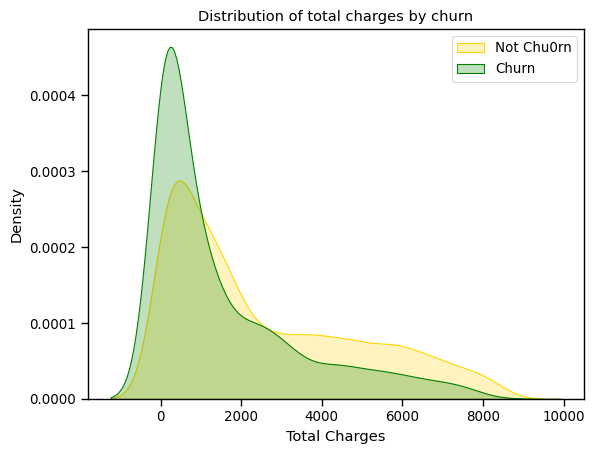

In [22]:
ax = sns.kdeplot(cust_churn.TotalCharges[(cust_churn["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(cust_churn.TotalCharges[(cust_churn["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

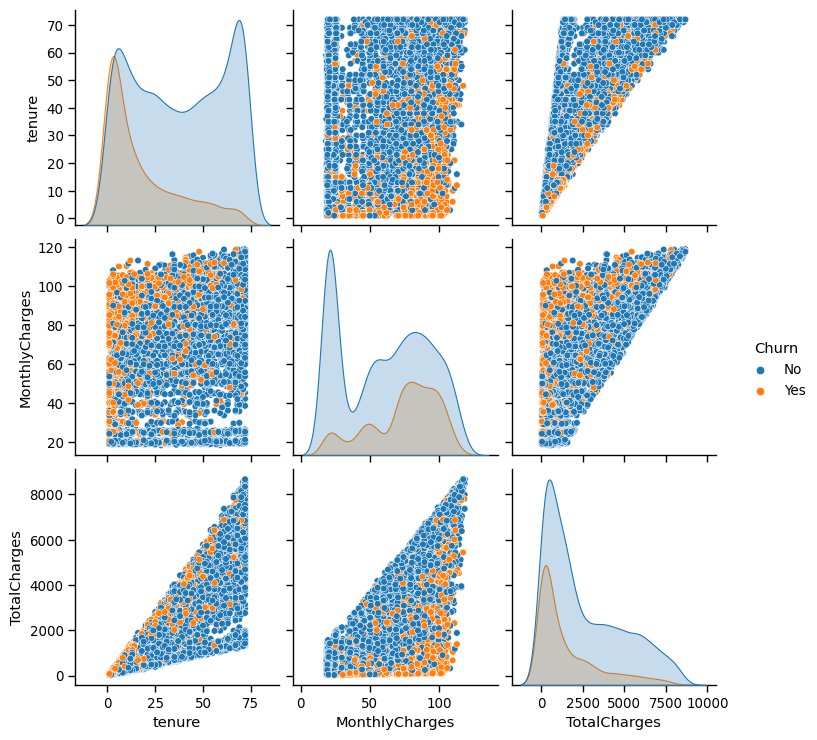

In [23]:
sns.pairplot(cust_churn, hue = "Churn")
plt.show()

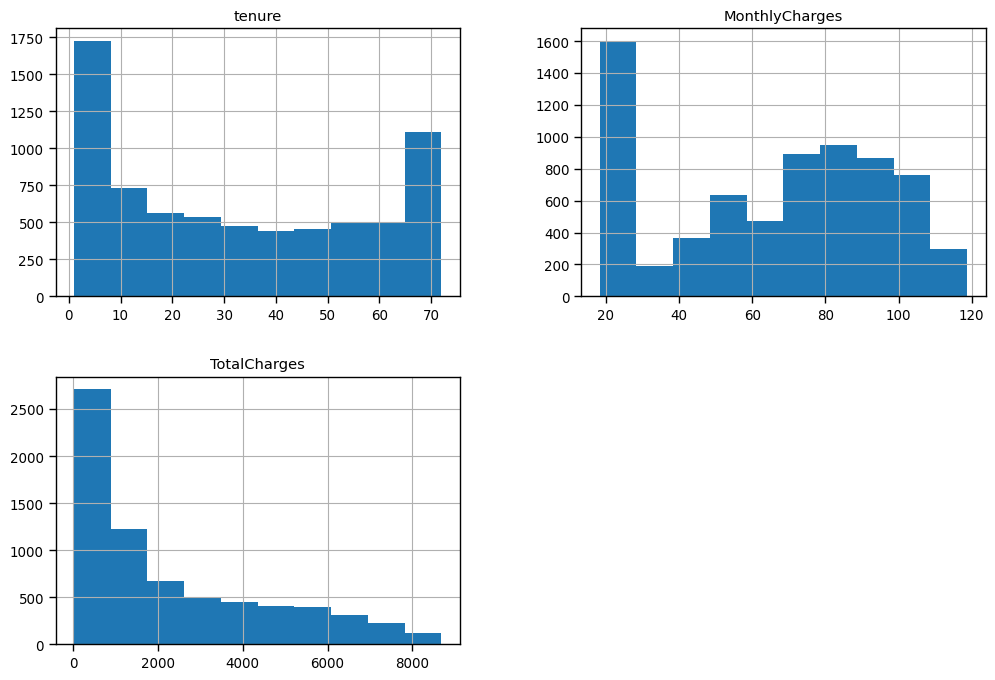

In [24]:
cust_churn.hist(figsize=(12, 8))
pyplot.show()

<AxesSubplot:>

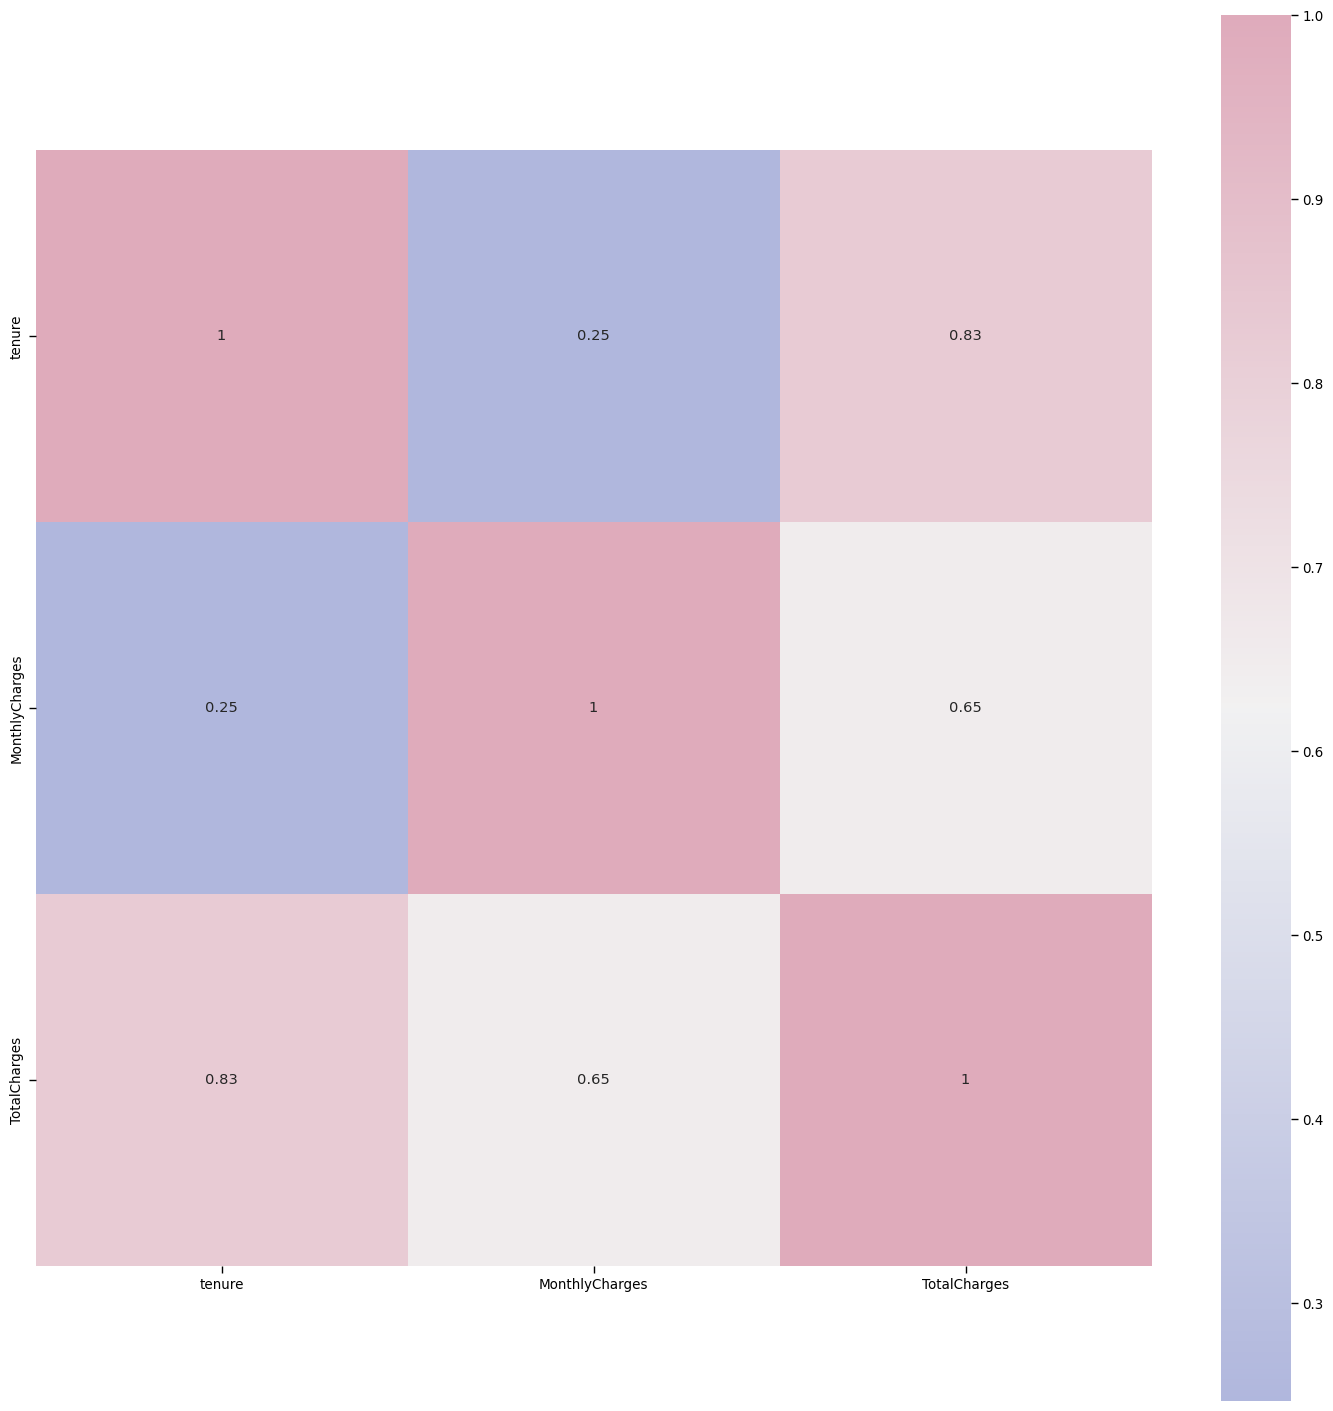

In [26]:
corrmat = cust_churn.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

- There is high correlation between some of the variables, this will cause multicollinearity in the model

### Data Preprocessing

### Splitting the data into train and test sets

In [27]:
# To do algorithms we have to label code variables
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [28]:
cust_churn = cust_churn.apply(lambda x: object_to_int(x))
cust_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
# Finding Correlation for the variables
plt.figure(figsize=(14,7))
cust_churn.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [30]:
X = cust_churn.drop(columns = ['Churn'])
y = cust_churn['Churn'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40, stratify=y)

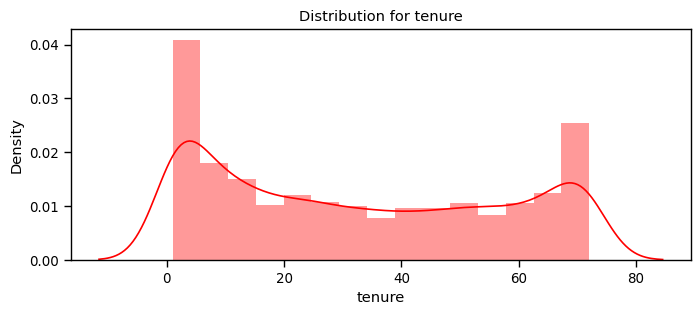

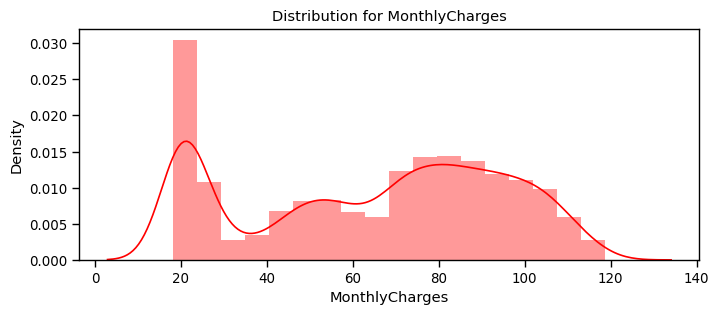

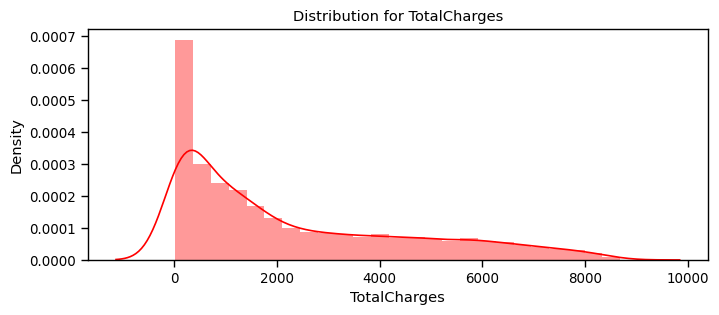

In [32]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, cust_churn)

- Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

#### Standardizing numeric attributes

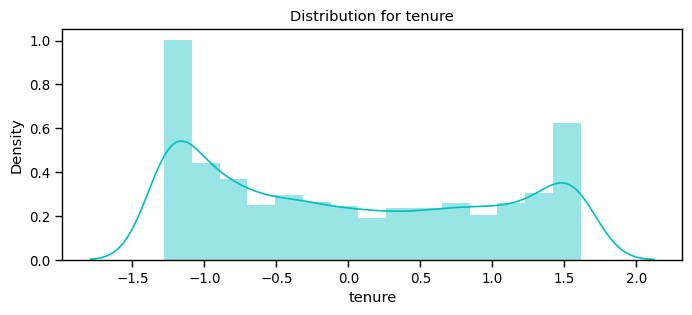

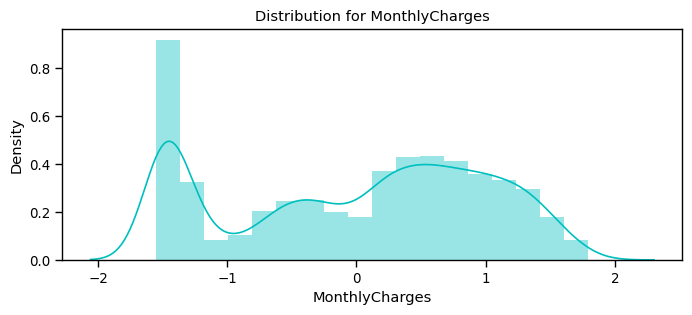

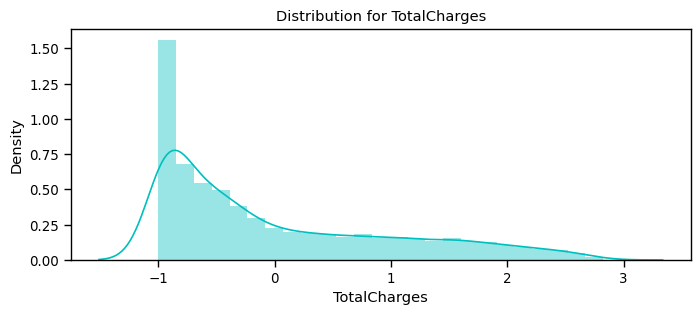

In [33]:
cust_churn_std = pd.DataFrame(StandardScaler().fit_transform(cust_churn[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, cust_churn_std, color='c')

### Feature Scaling

In [34]:
#Divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [35]:
sc = StandardScaler ()
X_train = sc.fit_transform (X_train)
X_test = sc.transform (X_test)

### Machine Learning mode Evaluation and algorithms

In [36]:
X_train.shape

(5274, 19)

In [37]:
y_train.shape

(5274,)

In [38]:
X_test.shape

(1758, 19)

In [39]:
y_test.shape

(1758,)

### Logistic Regression Model

In [40]:
classifier_log = LogisticRegression ()
classifier_log1=classifier_log.fit (X_train, y_train)
Y_pred_log = classifier_log.predict (X_test)
cm_log = confusion_matrix (y_test, Y_pred_log)
acc_log = accuracy_score (y_test, Y_pred_log)
Y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

### KNN Model

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
Y_pred_knn = knn_model.predict (X_test)
cm_knn = confusion_matrix (y_test, Y_pred_knn)
acc_knn = accuracy_score (y_test, Y_pred_knn)

### Decision Tree Model

In [42]:
classifier_dtc = DecisionTreeClassifier ()
classifier_dtc.fit (X_train, y_train)
Y_pred_dtc = classifier_dtc.predict (X_test)
cm_dtc = confusion_matrix (y_test, Y_pred_dtc)
acc_dtc = accuracy_score (y_test, Y_pred_dtc)

### Naive Bayes Model

In [43]:
classifier_nb = GaussianNB ()
classifier_nb.fit (X_train, y_train)
Y_pred_nb = classifier_nb.predict (X_test)
cm_nb = confusion_matrix (y_test, Y_pred_nb)
acc_nb = accuracy_score (y_test, Y_pred_nb)

### Random Forest

In [44]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
Y_pred_rfc = model_rf.predict (X_test)
cm_rfc = confusion_matrix (y_test, Y_pred_rfc)
acc_rfc = accuracy_score (y_test, Y_pred_rfc)

### Accuracy Comparison

In [45]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["LOGISTIC REGRESSION", "K-NN", "DECISION TREE", "Naive Bayes","Random Forest"],
           "ACCURACY SCORE " : [acc_log, acc_knn,acc_dtc, acc_nb,acc_rfc]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,LOGISTIC REGRESSION,0.809443
1,K-NN,0.779295
2,DECISION TREE,0.733788
3,Naive Bayes,0.771900
4,Random Forest,0.811149


 - From the table above it is fairly evident that the Logistic Regression has the highest accuracy score of 0.809443 (80.94%) for our dataset.

### HYPER-PARAMETER TUNING

### Logistic Regression Model

In [46]:
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1,10,100,1000,10000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
grid_search = GridSearchCV(estimator = classifier_log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs= -1,
                           cv=10,
                           refit=True,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy_log = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_log)
print(best_parameters)

0.8014749008107642
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


### KNN Model

In [47]:
parameters = [{'n_neighbors': [3,5,7,10,13,15], 'weights': ['uniform', 'distance'],
                'p': [1,2]}]
grid_search = GridSearchCV(estimator = knn_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           refit=True,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy_knn = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_knn)
print(best_parameters)

0.7789100684261975
{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


### Decision Tree

In [48]:
parameters = [{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 
                'max_leaf_nodes': [2,4,6,10,15,30,40,50,100], 'min_samples_split': [2, 3, 4,5]}]
grid_search = GridSearchCV(estimator = classifier_dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           refit=True,
                           return_train_score=True)
grid_search.fit(X_train, y_train)
best_accuracy_dtc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_dtc)
print(best_parameters)

0.7895247541831982
{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 15, 'min_samples_split': 2}


### Random Forest

In [49]:
parameters = [{'n_estimators': [100,200,300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,25,50,'none'],
               'min_samples_leaf': [1, 2], 
               'min_samples_split': [2, 5]}]
grid_search = GridSearchCV(estimator = model_rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy_rfc = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy_rfc)
print(best_parameters)

0.7969233367833937
{'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


### Final Accuracies After Hyper Parameter Tuning

In [50]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE", "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)"]
df_pred = {"NAME OF MODEL" : ["LOGISTIC REGRESSION", "K-NN", "NAIVE BAYES", "DECISION TREE", "RANDOM FOREST"],
           "ACCURACY SCORE " : [acc_log, acc_knn, acc_nb, acc_dtc, acc_rfc],
           "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)" : [best_accuracy_log, best_accuracy_knn, "-", best_accuracy_dtc, best_accuracy_rfc]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE,BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)
0,LOGISTIC REGRESSION,0.809443,0.801475
1,K-NN,0.779295,0.77891
2,NAIVE BAYES,0.771900,-
3,DECISION TREE,0.733788,0.789525
4,RANDOM FOREST,0.811149,0.796923


- it is fairly evident that it is the Logistic Regression model that has come out with the highest accuracies both before and after the hyper-parameter tuning. It ended up with an accuracy of 0.809443 (80.94%) before hyper-parameter tuning but 0.8014 (80.14%) after and is hence, the best suited model out of the rest for the given dataset.

In [57]:
dict1={}
for i in cust_churn.columns[:-1]:
    print(i," ")
    dict1[i]=input(" ")

gender  
 1
SeniorCitizen  
 1
Partner  
 0
Dependents  
 1
tenure  
 0
PhoneService  
 1
MultipleLines  
 0
InternetService  
 1
OnlineSecurity  
 0
OnlineBackup  
 1
DeviceProtection  
 0
TechSupport  
 1
StreamingTV  
 0
StreamingMovies  
 1
Contract  
 0
PaperlessBilling  
 1
PaymentMethod  
 0
MonthlyCharges  
 1
TotalCharges  
 0


In [58]:
df1=pd.DataFrame(dict1,index=[0])
print(df1)

  gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines  \
0      1             1       0          1      0            1             0   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0               1              0            1                0           1   

  StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod  \
0           0               1        0                1             0   

  MonthlyCharges TotalCharges  
0              1            0  


In [59]:
op=classifier_log1.predict(df1)

In [60]:
if op==1:
    print("The Customers are satisfied with the service of the company ")
else:
    print("The customers are not Satisfied with the service, Need to improve Service of the company ")

The customers are not Satisfied with the service, Need to improve Service of the company 


###  Conclusion: 

- Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.

### Reference:
- https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction
- https://www.kaggle.com/code/abhinavdevarajan/breast-cancer-analysis-with-hyper-parameter-tuning/notebook
    